# Empalme con la clase anterior.
En la clase anterior vimos que una red neuronal
está compuesta de capas con nodos (neuronas) y que
la conexión entre capa y capa representa una combinación lineal de funciones de activación (con argumentos lineales como función de los pesos entre capas). Por que las **funciones de activación** no son polinomios, que mediante el teorema de Taylor o de Weirstrass pueden ajustarse a cualquier función continua. O funciones trignométricas $\sin(kx), \cos(kx)$ que de acuerdo a Fourier pueden ajustarse a funciones continuas o con un número finito de descontinuidades, tanto como queramos?

# Backpropagation (propagación hacia atrás): Gradiente de la función de costo.

Los pasos para aprender en ML con gradiente son

* Construir la funcion de costo.
* Hallar el gradiente de la funci'on de costo (la parte dura).
* Actualizar los parametros $\Theta$ mediante entrenamiento. Cada actualizacion se llama una **epoca** (epoch).
La actualizacion es de la forma

$$\Theta^{(p)} \to \Theta^{(p)} - \alpha \nabla_\Theta J $$
$$\Theta^{(p+1)} = \Theta^{(p)} - \alpha \nabla_\Theta J $$

## Funcion de costo.
Usamos la funcion de costo de la regresion logistica que es la que sirve para clasificar entre dos objetos. Pueden ser mas.

$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$


Realmente debemos considerar el problema multiclase.  Para esto extendemos esta funcion a varias clases. $K>2$

$$J(\Theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log [h_k(\Theta, x^{(i)})] + (1 - y_i^{(k)}) \log [ 1 - h_k(\Theta, x^{(i)}) ] + \frac{\lambda}{2m} \sum_{l=1}^L \sum_{l_1=1}^{n_{l-1}} \sum_{j=1}^{n_l} (\Theta_{l_1j k})^2 \tag{1} $$

# Propagaci'on hacia atras.
Antes de llagar a la ultima capa para propagar hacia atras. Debemos movernos de la primera hasta la ultima con propagacion hacia adelante. La primera vez con $\Theta$ aleatorio. Esta propagaci'on esta dada por
Asumimos que la funci'on es sigmoid $S$.

Vamos a asumir $L+1$ capas. $1$ de entrada, $L-1$ ocultas y una de salida.
\begin{eqnarray}
A^{(1)} &=& X  \\
A^{(2)} &=& S(Z^{(2)}) = S(X \Theta^{(1)}) \\
A^{(3)} &=& S(Z^{(3)}) = S(A^{(2)} \Theta^{(2)}) \\
&\vdots& \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S(A^{(L-2)} \Theta^{(L-2)}) \\
h(\Theta,X) &=& A^{(L+1)} = S(Z^{(L+1)}) = S(A^{(L)} \Theta^L)
\end{eqnarray}

Tomamos el gradiente con respecto a la salida.

En notacion indizal.
$$h_{ij}(\Theta, X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right )
= S_{ij} = A_{ij}^{(L+1)} \quad , i=1,2, \cdots, K  $$

Primera mision es sacar el gradiente con respecto a la ultima capa.

La funcion de costo sin regularizacion.

$$J(\Theta) = -\frac1m \sum_{i=1}^m \sum_{j=1}^K y_{ij} \log [h_{ij}(\Theta, x^{(i)})] + (1 - y_{ij}) \log [ 1 - h_{ij}(\Theta, x^{(i)}) ] \tag{2} $$

Recuerden $S'(t)=S(t)(1 - S(t)$
\begin{eqnarray}
\frac{J(\Theta, X)}{\partial \Theta_{pq}^{(L)}}
&=&
-\frac1m \sum_i \sum_j y_{ij} \frac{S_{ij}(1-S_{ij})}{S_{ij}}  
\sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj}  +
\frac1m \sum_i \sum_j (1 - y_{ij}) \frac{S_{ij} (1 - S_{ij})}{1 - S_{ij}}
\left ( \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right )  \\
&=&
-\frac1m \sum_i y_{iq} \frac{S_{iq}(1-S_{iq})}{S_{iq}}  
 A_{ip}^{(L)}  + \frac1m \sum_i (1 - y_{iq}) \frac{S_{iq} (1 - S_{iq})}{1 - S_{iq}}
\left (  A_{ip}^{(L)} \right )  \\
&=&\frac1m \sum_i -y_{iq}(1 - S_{iq}) A_{ip}^{(L)} + (1 - y_{iq}) S_{iq} A_{ip}^{(L)} \\
&=&\frac1m \sum_i -y_{iq} A_{ip}^{(L)} + y_{iq} S_{iq} A_{ip}^{(L)} + S_{iq} A_{ip}^{(L)} - y_{iq} S_{iq} A_{ip}^{(L)} \\
&=& \frac1m \sum_i ( S_{iq} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m (A^{(L)})_p^T (A^{(L+1)} - Y)_q
\end{eqnarray}


En resumen

$$\left ( \frac{\partial J(\Theta X)}{\partial \Theta_{pq}^{(L)}}\right ) = \frac1m  ( (A^{(L)})^T (A^{(L+1) - Y)})_{pq}$$

Sigue la derivada con respecto a la penultima capa.

Recuerden

$$h_{ij}(\Theta, X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right )  = A_{ij}^{(L+1)} $$

y
$$A_{ik}^{(L)} = S(Z_{ik}^{(L)})  = S \left ( \sum_r A_{ir}^{(L-1)} \
\Theta_{rk}^{(L-1)} \right )  $$

Entonces vamos por partes. Sacamos la derivada del $\log$ y luego del $1-\log$ en la Ecuacion

\begin{eqnarray}
\frac{\partial \log ( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& \frac{S_{ij} (1 - S_{ij})}{S_{ij}}   \sum_k
\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{pq}^{(L)} \\
&=& (1 - A_{ij}^{(L+1)}) \sum_{k}  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \tag{3} \\
\end{eqnarray}

Calculemos aparte la derivada parcial

$$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{kj}^{(L-1)}} = S_{ik}(1 -S_{ik}) \sum_r A_{ir}^{(L-1)} \delta_{rp} \delta_{kq} = A_{ik}^{(L)}( 1- A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq}  $$

Insertamos esto en la Ecuacion (3)\begin{eqnarray}
\frac{\partial \log ( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& (1 - A_{ij}^{(L+1)}) \sum_{k}  
 A_{ik}^{(L)}( 1- A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq}
\Theta_{pq}^{(L)}
\end{eqnarray}
Es decir

$$
\frac{\partial \log ( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} =
(1 - A_{ij}^{(L+1)}) ( A_{iq}^{(L)}( 1- A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}  \tag{4}
$$

Vamos con el segundo termino de la Ecuacion (2).

\begin{eqnarray}
\frac{\partial \log (1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& -\frac{S_{ij}(1- S_{ij})}{1 - S_{ij}}  \sum_k
\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{pq}^{(L)}  \\
&=& -S_{ij} \sum_k  A_{ik}^{(L)}( 1- A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq}  \\
&=& - A_{ij}^{(L+1)} ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \tag{5}
\end{eqnarray}

Juntamos (4) con (5)

Observe el factor comun
$$
y_{ij} \frac{\partial \log ( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}  +
(1 - y_{ij}) \frac{\partial \log (1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
=  \left (  A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj} \right) \left [ y_{ij} (1 - A_{ij}^{(L+1)}) - (1 - y_{ij}) A_{ij}^{(L+1)} \right ]
= (y_{ij} - A_{ij}^{(L+1)}) \left (  A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \right)
$$

Insertando esto en la Ecuacion (2)

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \theta_{pq}^{(L-1)}}
&=& \frac1m \sum_i \sum_j (A_{ij}^{(L+1)} - y_{ij}) \left (  A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \right) \\
&=& \frac1m \sum_i A_{iq}^{(L)} (1 - A_{iq})^{(L)} A_{ip}^{(L-1)} \sum_j ( A_{ij}^{(L+1)} - Y) \Theta_{qj}^{(L)} \\
&=& \frac1m \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}
[ A^{(L+1)} - Y (\Theta^{(L)})^T ]_{iq} \\
&=& \frac1m \sum_i A_{ip}^{(L-1)} [ (A^{(L+1)}- Y)(\Theta^{(L)})^T_{iq} A_{iq}^{(L)} (1 - A_{iq}^{(L)}) \\
&=& \sum_i A_{ip}^{(L-1)} [ A^{(L+1)} - Y) (\Theta^{(L)})^T]_{iq} [A^{(L)} \circ (1 - A^{(L)})]_{iq} \\
&=& \frac1m [ (A^{(L-1)} )^T]_p [  ( A^{(L+1)} - Y) (\Theta^{(L))})^T A^{(L)} \circ (1 - A^{(L)})]_{q}
\end{eqnarray}

En general con $I=L-1, L-2, \cdots , 1$

$$
\frac{\partial J(\Theta, X)}{\partial \theta_{pq}^{(I)}}
= \frac1m [ (A^{(I)} )^T]_p [  ( A^{(I+2)} - Y) (\Theta^{(I+1))})^T A^{(I+1)} \circ (1 - A^{(I+1)})]_{q}
$$

Con esto tenemos el algoritmo para el gradiente.



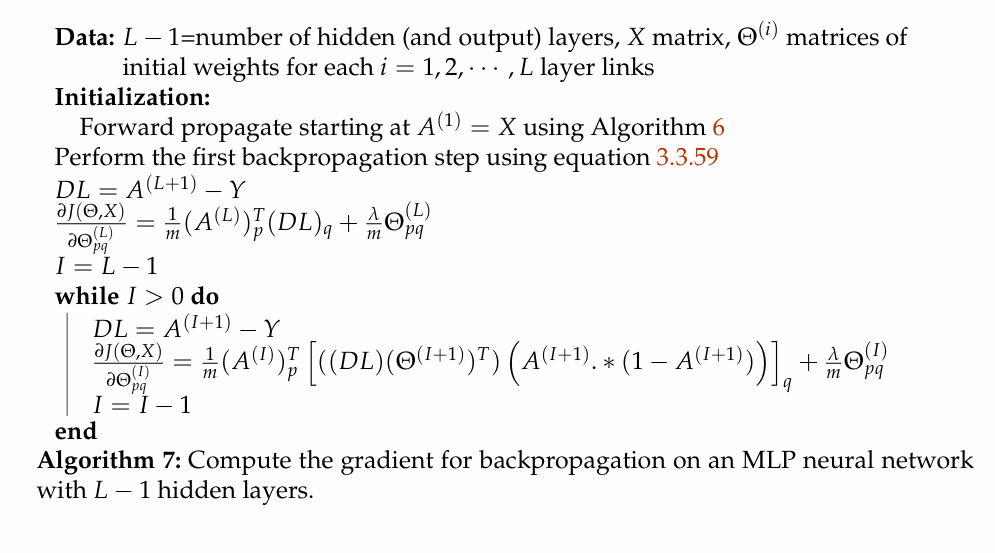

Que pasa con el termino de regularizacion.

$$\sum_i \sum_j \sum_l (\Theta_{ij}^{l})^2$$

Calculemos el gradiente de este termino con respecto a
$\Theta_{pqr}$

Queda

$$\sum_i \sum_j \sum_r 2 ( \Theta_{ij}^l) \delta_{ip} \delta_{jq} \delta_{r l} = 2 \Theta_{pq}^r $$


# Diagnosticos y seleccion de modelos.
Debemos dividir el conjunto de datos en varios paquetes. Ac'a sugerimos

1. Un paquete para el entrenamiento (training) (60 \%)
Este paquete sirve para entrenar el modelo y obtener parametros que pueden ser o no ser buenos.
2. Un paquete para validacion cruzada (CV=Cross validation) (20 \%)
Sirve para hacer "fine tunning" (calibrar) los parametros.

3. Un paquete para prueba (test) (20 \%)
Este el juicio final.

Para explicar esta division vamos a usar un ejemplo.

**Ejemplo 3.3.7**: Asuma un modelo de regresion polinomica. Queremos hallar el grado optimo del polinomio en una variable que se ajuste a nuestros datos.

\begin{eqnarray}
h_1(\theta, x) &=& \theta_0 + \theta_1 x \\
h_2(\theta, x) &=& \theta_0 + \theta_1 x  \theta_2 x^2 \\
&\vdots &  \\
h_6(\theta, x) &=& \theta_0 + \theta_1 x  \theta_2 x^2 + \cdots + \theta_6 x^6 \\
\end{eqnarray}
Podemos pensar en tres funciones de costo correspodientes a los tres montones

$$J_\text{train} = \frac{1}{m_{\text{train}}}
\left [ \sum_{i=1}^{m_{\text{train}}} (h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{train}}} \theta_i^2 \right ]  $$

$$J_\text{cv} = \frac{1}{m_{\text{cv}}}
\left [ \sum_{i=1}^{m_{\text{cv}}} (h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{cv}}} \theta_i^2 \right ]  $$

$$J_\text{test} = \frac{1}{m_{\text{test}}}
\left [ \sum_{i=1}^{m_{\text{test}}} (h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{\text{test}}} \theta_i^2 \right ]  $$

La idea es la siguiente.
Se entrena con el 40 \% de los datos. El CV (Cross validation) se usa para buscar el mejor grado de polinomio que se adapte a nuestros datos. En general
los parametros que se ajustan son muchos: Por ejemplo

* Numero de capas en una red neuronal
* Numero de nodos por capa
* Grado del polinomio
* Numero de variables en el polinomio
* $\lambda$ parametro de regularization
* etc.

Una vez se tenga que, por ejemplo $3$ es el grado que mejor se ajusta,
escogemos este para guardar los parametros $\theta$ y ser utilizados en el test o para produccion.

La validacion cruzada, tambien se puede hacer con $k$-fold cross validation.
Recuerden $k$-fold cross validation.

* Se parten los datos en $k$ grupos.
* Se usan $k-1$ para entrenar y el restante para probar.
* Se circulan:
$$1 \quad \text{       versus              } \quad  2, 3, \cdots , k $$
$$2 \quad \text{       versus              } \quad  1 , 3, 4 \cdots , k $$
$$3 \quad \text{       versus              } \quad  1 , 2, 4 \cdots , k $$
$$k \quad \text{       versus              } \quad  1 , 2, 3 \cdots , k-1 $$

Se hacen $k$ pruebas y se escoje el promedio de la precision.

# Proxima clase:
Bias versus Variance
(Sesgo versus Varianza).


